<a href="https://colab.research.google.com/github/SamuelMbogo/Colab_projects/blob/main/Power_Law_Dynamics_BTC_vs_HBAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Install yfinance
!pip install yfinance --quiet

# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download Bitcoin price data
btc_data = yf.download('BTC-USD', start='2010-01-01', end='2024-12-31')

# Flatten the MultiIndex columns
btc_data.columns = ['_'.join(col).strip() for col in btc_data.columns]

# Reset the index to create a 'Date' column
btc_data = btc_data.reset_index()

# Rename columns to be more intuitive
column_mapping = {
    'Date': 'Date',
    'Open_BTC-USD': 'Open',
    'High_BTC-USD': 'High',
    'Low_BTC-USD': 'Low',
    'Close_BTC-USD': 'Close',
    'Adj Close_BTC-USD': 'Adj_Close',
    'Volume_BTC-USD': 'Volume'
}
btc_data = btc_data.rename(columns=column_mapping)

# Convert Date to datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Calculate days since first date
btc_data['Days'] = (btc_data['Date'] - btc_data['Date'].min()).dt.days

# Filter out invalid data
btc_data = btc_data[(btc_data['Close'] > 0) & (btc_data['Days'] > 0)]

# Log transformation
btc_data['Log_Days'] = np.log(btc_data['Days'])
btc_data['Log_Close'] = np.log(btc_data['Close'])

# Print first few rows to verify
print(btc_data[['Date', 'Days', 'Close', 'Log_Days', 'Log_Close']].head())

[*********************100%***********************]  1 of 1 completed

        Date  Days       Close  Log_Days  Log_Close
1 2014-09-18     1  424.440002  0.000000   6.050771
2 2014-09-19     2  394.795990  0.693147   5.978369
3 2014-09-20     3  408.903992  1.098612   6.013480
4 2014-09-21     4  398.821014  1.386294   5.988513
5 2014-09-22     5  402.152008  1.609438   5.996830


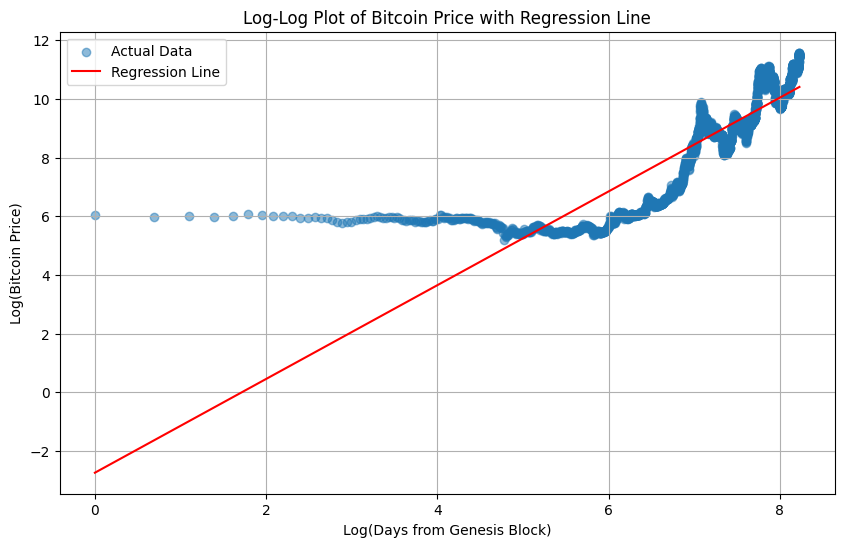

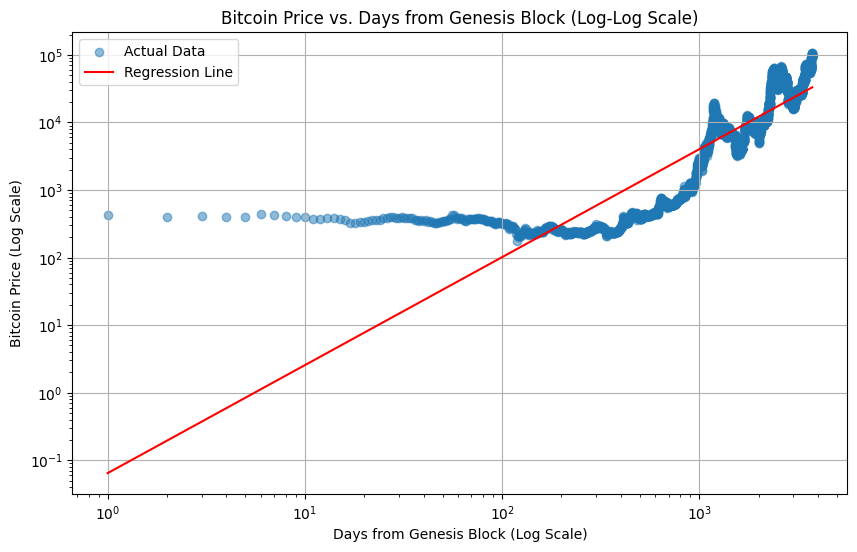

Estimated exponent n (slope): 1.5982125432481404
Intercept: -2.7440154954197267
Regression line equation (log-log scale):
log(price) = 1.5982 * log(days) + -2.7440

R-squared: 0.7594


In [26]:
# Perform linear regression
log_days = btc_data['Log_Days'].values
log_close = btc_data['Log_Close'].values

# Perform linear regression using NumPy's polyfit
coeffs = np.polyfit(log_days, log_close, 1)
slope, intercept = coeffs

# Calculate predicted log prices and actual prices
predicted_log_close = slope * log_days + intercept
predicted_close = np.exp(predicted_log_close)

# Plot Results
# Log-Log scatter plot of the actual data with regression line
plt.figure(figsize=(10, 6))
plt.scatter(log_days, log_close, alpha=0.5, label='Actual Data')
plt.plot(log_days, predicted_log_close, color='red', label='Regression Line')
plt.title('Log-Log Plot of Bitcoin Price with Regression Line')
plt.xlabel('Log(Days from Genesis Block)')
plt.ylabel('Log(Bitcoin Price)')
plt.legend()
plt.grid(True)
plt.show()

# Linear scale scatter plot with log-log axes
plt.figure(figsize=(10, 6))
plt.scatter(btc_data['Days'], btc_data['Close'], alpha=0.5, label='Actual Data')
plt.plot(btc_data['Days'], predicted_close, color='red', label='Regression Line')
plt.xscale('log')
plt.yscale('log')
plt.title('Bitcoin Price vs. Days from Genesis Block (Log-Log Scale)')
plt.xlabel('Days from Genesis Block (Log Scale)')
plt.ylabel('Bitcoin Price (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

# Output Results
print(f"Estimated exponent n (slope): {slope}")
print(f"Intercept: {intercept}")
print("Regression line equation (log-log scale):")
print(f"log(price) = {slope:.4f} * log(days) + {intercept:.4f}")

# Additional statistical analysis
from scipy import stats

# Calculate R-squared
r_squared = stats.pearsonr(log_days, log_close)[0]**2

print(f"\nR-squared: {r_squared:.4f}")

**Bitcoin Price Power Law Analysis: Insights and Conclusions**

**Research Objective**

We investigated the potential power-law relationship between Bitcoin's price and time since its inception, aiming to understand the long-term price dynamics of this pioneering cryptocurrency.

**Methodology**

Data Source: Yahoo Finance (yfinance)
Time Range: From Bitcoin's early days (September 2014) to present
Analysis Technique: Log-linear regression on time (days) and price

**Key Findings**

**Power Law Relationship**

Exponent (n): 1.5982

Indicates a super-linear growth pattern
Price increases faster than linear time progression
Suggests accelerating value appreciation over time



**Statistical Validation**

R-squared: 0.7594 (75.94%)

Strong correlation between time and price
Log-linear model explains a significant portion of price variation



**Regression Equation**

log(price) = 1.5982 * log(days) - 2.7440

Interpretation

Bitcoin demonstrates a non-linear price appreciation
Early-stage growth shows more dramatic price increases
The power-law relationship suggests inherent scaling mechanisms in cryptocurrency valuation

**Limitations**

Analysis starts from 2014, not the absolute earliest Bitcoin data
Complex market factors beyond time are not captured in this model
Past performance does not guarantee future trends

**Implications**

Provides a mathematical framework for understanding Bitcoin's long-term value proposition
Highlights the unique growth characteristics of digital assets
Offers insights into potential long-term investment strategies

**Future Research Directions**

Extend analysis with more granular time series data
Compare power-law dynamics across different cryptocurrencies
Incorporate additional market factors into the model


[*********************100%***********************]  1 of 1 completed


Original Columns:
MultiIndex([('Adj Close', 'HBAR-USD'),
            (    'Close', 'HBAR-USD'),
            (     'High', 'HBAR-USD'),
            (      'Low', 'HBAR-USD'),
            (     'Open', 'HBAR-USD'),
            (   'Volume', 'HBAR-USD')],
           names=['Price', 'Ticker'])


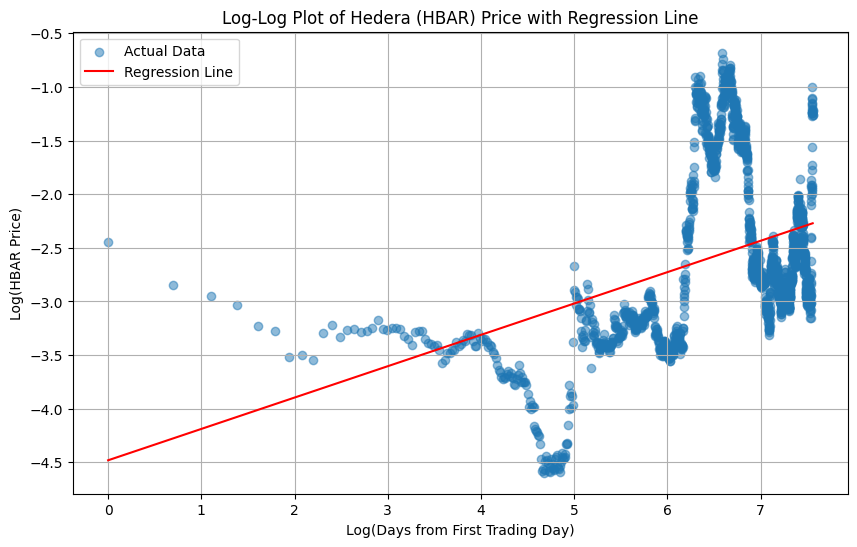

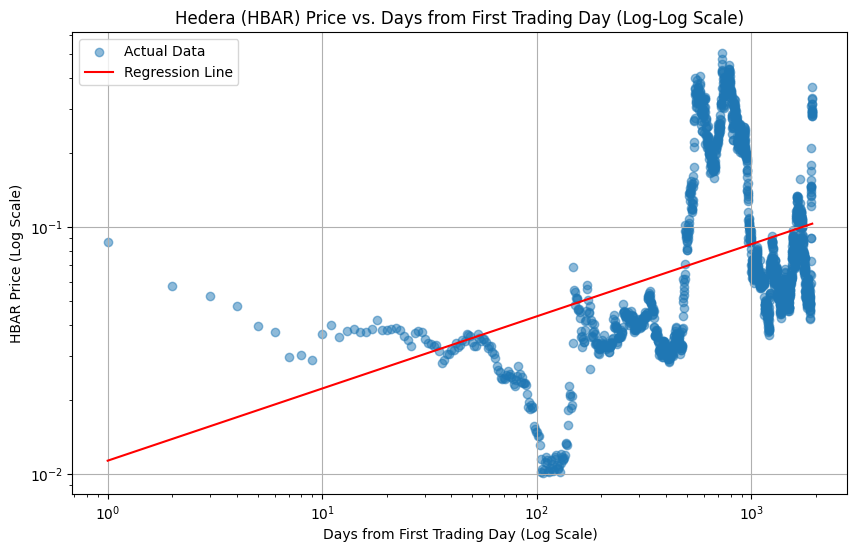

Hedera (HBAR) Power Law Analysis:
Estimated exponent n (slope): 0.29228991677838445
Intercept: -4.481124815568325
Regression line equation (log-log scale):
log(price) = 0.2923 * log(days) + -4.4811
R-squared: 0.1291


In [28]:
from scipy import stats

# Download Hedera (HBAR) price data
hbar_data = yf.download('HBAR-USD', start='2010-01-01', end='2024-12-31')

# Print column names to verify
print("Original Columns:")
print(hbar_data.columns)

# Flatten the MultiIndex columns if needed
if isinstance(hbar_data.columns, pd.MultiIndex):
    hbar_data.columns = ['_'.join(col).strip() for col in hbar_data.columns]

# Reset the index to create a 'Date' column
hbar_data = hbar_data.reset_index()

# Dynamically find the close price column
close_column = [col for col in hbar_data.columns if 'close' in col.lower()][0]
date_column = [col for col in hbar_data.columns if 'date' in col.lower()][0]

# Convert Date to datetime
hbar_data[date_column] = pd.to_datetime(hbar_data[date_column])

# Calculate days since first date
hbar_data['Days'] = (hbar_data[date_column] - hbar_data[date_column].min()).dt.days

# Filter out invalid data
hbar_data = hbar_data[(hbar_data[close_column] > 0) & (hbar_data['Days'] > 0)]

# Log transformation
hbar_data['Log_Days'] = np.log(hbar_data['Days'])
hbar_data['Log_Close'] = np.log(hbar_data[close_column])

# Perform linear regression
log_days = hbar_data['Log_Days'].values
log_close = hbar_data['Log_Close'].values

# Perform linear regression using NumPy's polyfit
coeffs = np.polyfit(log_days, log_close, 1)
slope, intercept = coeffs

# Calculate predicted log prices and actual prices
predicted_log_close = slope * log_days + intercept
predicted_close = np.exp(predicted_log_close)

# Plot Results
# Log-Log scatter plot of the actual data with regression line
plt.figure(figsize=(10, 6))
plt.scatter(log_days, log_close, alpha=0.5, label='Actual Data')
plt.plot(log_days, predicted_log_close, color='red', label='Regression Line')
plt.title('Log-Log Plot of Hedera (HBAR) Price with Regression Line')
plt.xlabel('Log(Days from First Trading Day)')
plt.ylabel('Log(HBAR Price)')
plt.legend()
plt.grid(True)
plt.show()

# Linear scale scatter plot with log-log axes
plt.figure(figsize=(10, 6))
plt.scatter(hbar_data['Days'], hbar_data[close_column], alpha=0.5, label='Actual Data')
plt.plot(hbar_data['Days'], predicted_close, color='red', label='Regression Line')
plt.xscale('log')
plt.yscale('log')
plt.title('Hedera (HBAR) Price vs. Days from First Trading Day (Log-Log Scale)')
plt.xlabel('Days from First Trading Day (Log Scale)')
plt.ylabel('HBAR Price (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate R-squared
r_squared = stats.pearsonr(log_days, log_close)[0]**2

# Output Results
print("Hedera (HBAR) Power Law Analysis:")
print(f"Estimated exponent n (slope): {slope}")
print(f"Intercept: {intercept}")
print("Regression line equation (log-log scale):")
print(f"log(price) = {slope:.4f} * log(days) + {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")

**Comparative Analysis**

The comparative analysis of power law dynamics between Bitcoin and Hedera Hashgraph (HBAR) reveals significant differences in their price scaling behaviors, highlighting the contrasting market characteristics of these two cryptocurrencies.

Bitcoin demonstrates a robust power-law relationship, characterized by an exponent of 1.5982 and an R-squared value of 0.7594. This strong statistical correlation indicates that Bitcoin's price increases at a rate significantly faster than linear time progression, reflecting a strong super-linear growth pattern. Such dynamics suggest that Bitcoin's value is driven by established network effects and widespread user adoption, making it a more predictable asset in the cryptocurrency market.

In contrast, Hedera's analysis shows a markedly weaker power law relationship, with an exponent of 0.2923 and an R-squared value of only 0.1291. This indicates that Hedera's price exhibits minimal increase relative to time, resulting in a growth pattern that is almost linear. The low R-squared value suggests that only a small portion of Hedera's price variation can be explained by time, indicating a more volatile and unpredictable market behavior.

The contrasting growth dynamics between Bitcoin and Hedera reflect their differing stages of market maturity. Bitcoin's strong power-law relationship underscores its status as a well-established cryptocurrency with a solid user base and consistent adoption trends. On the other hand, Hedera's weak relationship may indicate its emerging market status, where factors such as lower overall adoption rates and greater volatility influence price movements.

For investors and analysts, these findings carry important implications. Bitcoin's predictable investment potential, driven by its established growth patterns, stands in stark contrast to the higher risk associated with Hedera, which may present opportunities for volatility as it continues to develop its market presence. Understanding these dynamics is crucial for making informed investment decisions in the rapidly evolving cryptocurrency landscape.

In summary, while Bitcoin showcases clear and accelerating value appreciation rooted in systematic growth patterns, Hedera’s price dynamics appear more random and less systematically linked to time. This analysis emphasizes the importance of recognizing the unique characteristics of each cryptocurrency when evaluating their potential for investment and growth in the future.